In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.options.display.max_rows = 50
pd.options.display.max_columns = None
plt.rcParams["figure.figsize"] = (20,8)
plt.style.use('dark_background')

# Spending Data from Affinity (Daily)

# Data for New York City
this dataset contains credit/debit spending in the new york city area

In [83]:
aff_city_df = pd.read_csv("data/covid_and_others/data/Affinity - City - Daily.csv")
city_translation_df = pd.read_csv("data/covid_and_others/data/GeoIDs - City.csv")
city_translation = city_translation_df.set_index('cityid').to_dict()['cityname']

In [84]:
aff_city_df['cityid'].replace(city_translation, inplace=True)

In [85]:
ny_city_affinity = aff_city_df[aff_city_df['cityid'] == 'New York City']
ny_city_affinity['date'] = ny_city_affinity.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
ny_city_affinity.drop(ny_city_affinity[ny_city_affinity['freq'] != "d"].index, inplace=True)

<ipython-input-85-f9c6cf0cfc32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_city_affinity['date'] = ny_city_affinity.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
/Users/tomasortega/Desktop/projects/BDS_project/venv/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
ny_city_affinity = ny_city_affinity[['date', 'cityid', 'spend_all', 'spend_acf', 'spend_tws', 'spend_retail_no_grocery']]
ny_city_affinity = ny_city_affinity.replace(".", float("nan"))
for col in ['spend_all', 'spend_acf', 'spend_tws', 'spend_retail_no_grocery']:
    ny_city_affinity[col] = ny_city_affinity[col].astype("float64")
ny_city_affinity = ny_city_affinity.set_index(ny_city_affinity['date'])

<AxesSubplot:xlabel='date'>

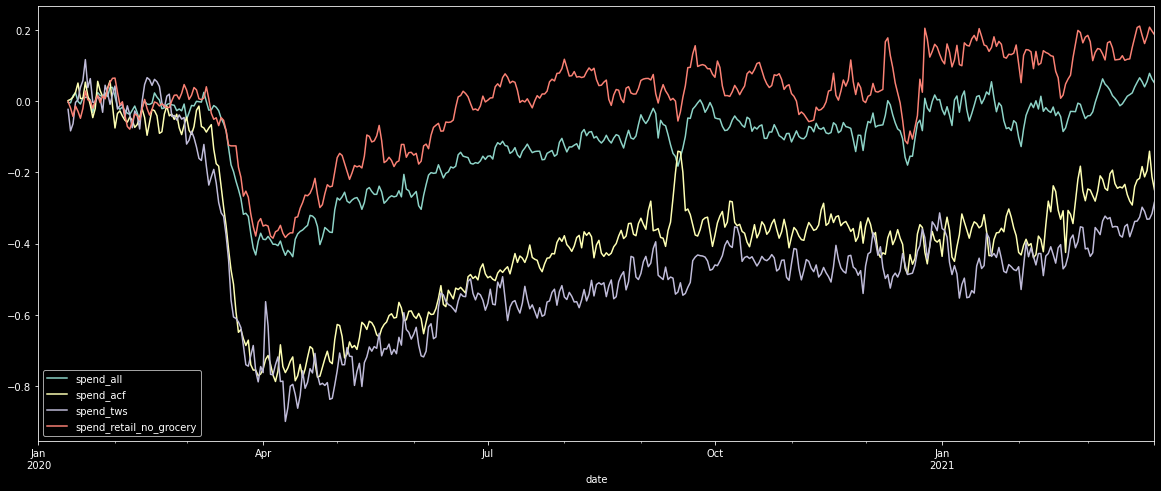

In [87]:
ny_city_affinity[['spend_all', 'spend_acf', 'spend_tws', 'spend_retail_no_grocery']].plot()

In [88]:
ny_city_affinity = ny_city_affinity.rename(columns={'spend_all': 'affinity_spend_all', 'affinity_spend_acf': 'affinity_spend_acf', 'spend_tws': 'affinity_spend_tws', 'spend_retail_no_grocery': 'affinity_spend_retail_no_grocery', 'cityid': 'city'})

In [89]:
ny_city_affinity.to_csv("data/covid/ny_city_spending_affinity.csv")
#

Data for each county in NY

In [90]:
aff_county_df = pd.read_csv("data/covid_and_others/data/Affinity - County - Daily.csv")
county_translation_df = pd.read_csv("data/covid_and_others/data/GeoIDs - County.csv")
county_translation = county_translation_df.set_index('countyfips').to_dict()['countyname']

aff_county_df = aff_county_df.merge(county_translation_df, how='left',left_on="countyfips", right_on="countyfips")
aff_county_df['countyfips'].replace(county_translation, inplace=True)
aff_county_df.drop(aff_county_df[aff_county_df['stateabbrev'] != 'NY'].index, inplace=True)
aff_county_df['date'] = aff_county_df.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
aff_county_df.drop(['countyfips', 'year', 'month', 'day', 'statefips', 'cz', 'statename', 'czname', 'provisional',  'cityname', 'cityid', 'provisional'], axis=1, inplace=True)

/Users/tomasortega/Desktop/projects/BDS_project/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [91]:
aff_county_df = aff_county_df.rename(columns={'spend_all': 'affinity_spend_all', 'countyname': 'county', 'stateabbrev': 'state'})

In [92]:
aff_county_df.columns

Index(['freq', 'affinity_spend_all', 'county', 'state', 'county_pop2019',
       'date'],
      dtype='object')

In [93]:
aff_county_df = aff_county_df.replace(".", float("nan"))
for col in ['affinity_spend_all', 'county_pop2019']:
    aff_county_df[col] = aff_county_df[col].astype("float64")

In [94]:
aff_county_df.to_csv("data/covid/per_county_spending_affinity.csv")

Data for State

In [95]:
aff_state_df = pd.read_csv("data/covid_and_others/data/Affinity - State - Daily.csv")
state_translation_df = pd.read_csv("data/covid_and_others/data/GeoIDs - State.csv")
state_translation = state_translation_df.set_index('statefips').to_dict()['statename']

In [96]:
aff_state_df = aff_state_df.merge(state_translation_df, how='left',left_on="statefips", right_on="statefips")
aff_state_df.drop(aff_state_df[aff_state_df['stateabbrev'] != 'NY'].index, inplace=True)
aff_state_df['date'] = aff_state_df.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
aff_state_df = aff_state_df[['spend_all', 'spend_acf', 'spend_tws', 'spend_retail_no_grocery', 'date', 'statename', 'state_pop2019', 'freq']]

In [97]:
aff_state_df.set_index(aff_state_df['date'])
aff_state_df.columns
aff_state_df = aff_state_df.replace(".", float("nan"))
for col in ['spend_all', 'spend_acf', 'spend_tws', 'spend_retail_no_grocery', 'state_pop2019' ]:
    aff_state_df[col] = aff_state_df[col].astype("float64")

<AxesSubplot:>

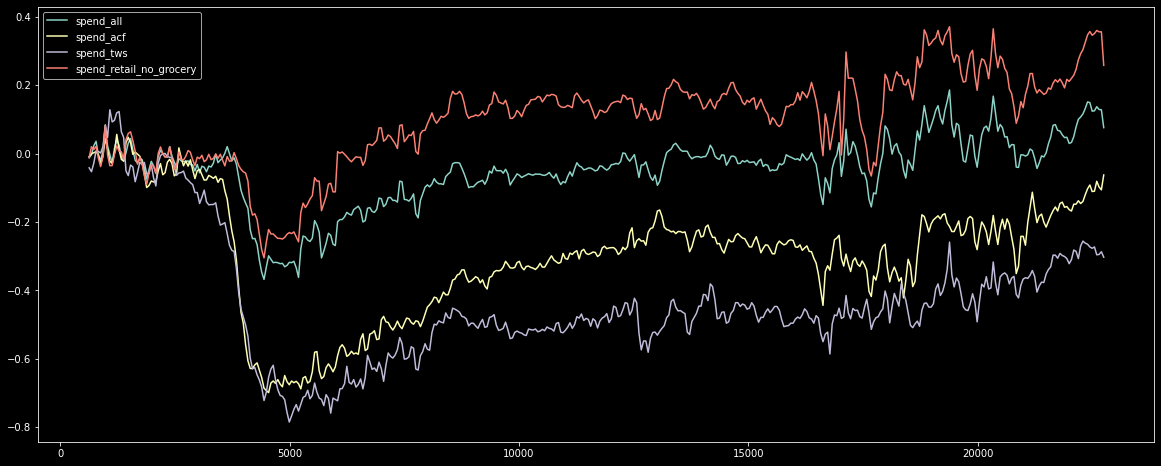

In [98]:
aff_state_df.drop(['date'], axis=1, inplace=True)
aff_state_df.to_csv("data/covid/ny_state_spending_affinity.csv", index=False)
aff_state_df[['spend_all', 'spend_acf', 'spend_tws', 'spend_retail_no_grocery']].plot()

# Now we explore the number of businesses open

In [99]:
womply_city_df = pd.read_csv("data/covid_and_others/data/Womply - City - Daily.csv")
womply_county_df = pd.read_csv("data/covid_and_others/data/Womply - County - Weekly.csv")
womply_state_df = pd.read_csv("data/covid_and_others/data/Womply - State - Daily.csv")

In [100]:
womply_city_df['date'] = womply_city_df.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
womply_city_df = womply_city_df.set_index(womply_city_df['date'])
womply_city_df.drop(['date', 'year', 'day', 'month'], axis=1, inplace=True)

In [101]:
womply_state_df.dtypes
# womply_state_df['date'] = womply_state_df.apply(lambda x : datetime.datetime(int(x.year), int(x.month), int(x.day)), axis=1)
# womply_state_df = womply_state_df.set_index(womply_state_df['date'])
# womply_state_df.drop(['date', 'year', 'day', 'month'], axis=1, inplace=True)
# womply_state_df = womply_state_df[['revenue_all', 'merchants_all']].rename({'merchants_all': 'num_merchants_all'})

year                              int64
month                             int64
day                               int64
statefips                         int64
revenue_all                     float64
revenue_inchigh                 float64
revenue_inclow                  float64
revenue_incmiddle               float64
revenue_ss40                    float64
revenue_ss60                    float64
revenue_ss65                    float64
revenue_ss70                    float64
revenue_food_accommodation      float64
revenue_retail                  float64
merchants_all                   float64
merchants_inchigh               float64
merchants_inclow                float64
merchants_incmiddle             float64
merchants_ss40                  float64
merchants_ss60                  float64
merchants_ss65                  float64
merchants_ss70                  float64
merchants_food_accommodation    float64
merchants_retail                float64
dtype: object

In [102]:
#
# womply_county_df['date'] = womply_county_df.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
# womply_county_df.drop(['date'], axis=1, inplace=True)

# Exploring Covid Data

COVID City

In [103]:
covid_city_df = pd.read_csv("data/covid_and_others/data/COVID - City - Daily.csv")
covid_county_df = pd.read_csv("data/covid_and_others/data/COVID - County - Daily.csv")
covid_state_df = pd.read_csv("data/covid_and_others/data/COVID - State - Daily.csv")

/Users/tomasortega/Desktop/projects/BDS_project/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
covid_city_df = covid_city_df.merge(city_translation_df, how='left',left_on="cityid", right_on="cityid")
covid_city_df.drop(covid_city_df[covid_city_df['cityname'] != 'New York City'].index, inplace=True)
covid_city_df['date'] = covid_city_df.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
covid_city_df = covid_city_df.set_index(covid_city_df['date'])
covid_city_df.drop(['stateabbrev', 'year', 'month', 'day', 'cityid', 'lat', 'lon', 'date'], axis=1, inplace=True)

<AxesSubplot:xlabel='date'>

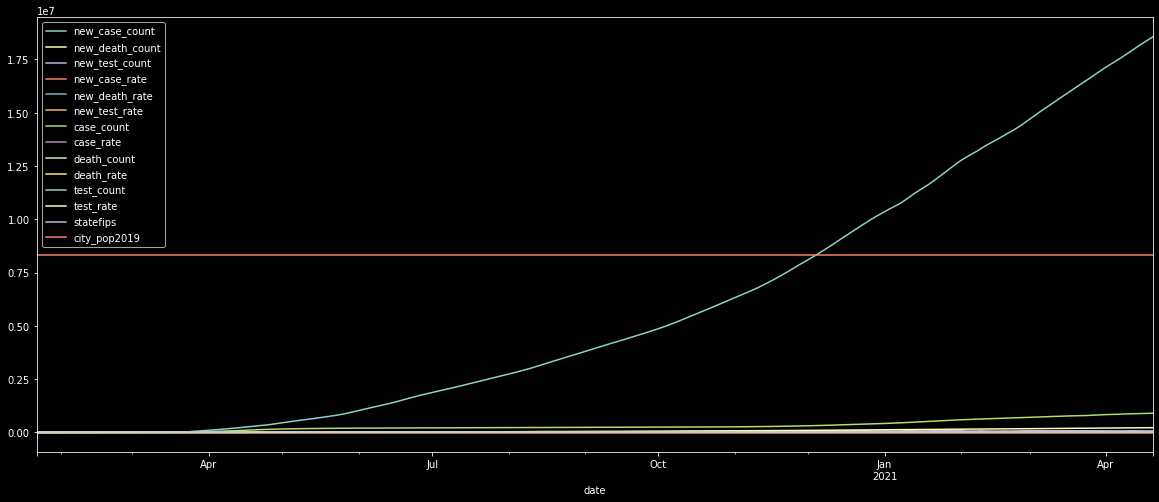

In [105]:
covid_city_df.plot()

In [106]:
covid_city_df.to_csv("data/covid/covid_nyc.csv")

COVID County

In [107]:
covid_county_df = covid_county_df.merge(county_translation_df, how='left',left_on="countyfips", right_on="countyfips")
covid_county_df = covid_county_df[covid_county_df['stateabbrev'] == 'NY']
covid_county_df['date'] = covid_county_df.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
covid_county_df = covid_county_df.set_index(covid_county_df['date'])
covid_county_df.drop(['stateabbrev', 'year', 'cz', 'czname', 'statefips', 'statename', 'month', 'day', 'cityid', 'date'], axis=1, inplace=True)
covid_county_df.to_csv("data/covid/covid_couty.csv")

COVID County

In [108]:
covid_state_df = covid_state_df.merge(state_translation_df, how='left',left_on="statefips", right_on="statefips")
covid_state_df = covid_state_df[covid_state_df['stateabbrev'] == 'NY']
covid_state_df['date'] = covid_state_df.apply(lambda x : datetime.datetime(x.year, x.month, x.day), axis=1)
covid_state_df = covid_state_df.set_index(covid_state_df['date'])
covid_state_df.drop(['stateabbrev', 'year', 'statefips', 'month', 'day', 'date'], axis=1, inplace=True)

In [109]:
covid_state_df.to_csv("data/covid/covid_statey.csv")